<a href="https://colab.research.google.com/github/saileshraturi/TransferLearningforClassification/blob/master/TransferLearningforClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,Flatten,Lambda
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel,preprocess_input
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os


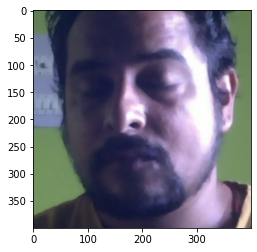

In [2]:
plt.imshow(image.load_img('Datasets/Train/Sailesh/170.jpg'))
plt.show()

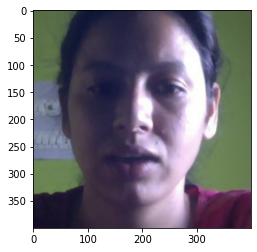

In [3]:
plt.imshow(image.load_img('Datasets/Train/Shivani/108.jpg'))
plt.show()

In [4]:
!ls Datasets/Train/Sailesh

1.jpg     13938.jpg 16059.jpg 1818.jpg  202.jpg   22220.jpg 25048.jpg 41.jpg
10.jpg    14.jpg    161.jpg   18180.jpg 2020.jpg  223.jpg   25149.jpg 42.jpg
1010.jpg  14039.jpg 1616.jpg  182.jpg   20200.jpg 22321.jpg 2525.jpg  43.jpg
10201.jpg 141.jpg   16160.jpg 18281.jpg 203.jpg   224.jpg   25250.jpg 44.jpg
10302.jpg 1414.jpg  162.jpg   183.jpg   20301.jpg 22422.jpg 25351.jpg 45.jpg
10403.jpg 14140.jpg 16261.jpg 18382.jpg 204.jpg   225.jpg   25452.jpg 46.jpg
10504.jpg 142.jpg   163.jpg   184.jpg   20402.jpg 22523.jpg 25553.jpg 47.jpg
10605.jpg 14241.jpg 16362.jpg 18483.jpg 205.jpg   226.jpg   25654.jpg 48.jpg
10706.jpg 143.jpg   164.jpg   185.jpg   20503.jpg 22624.jpg 25755.jpg 49.jpg
10807.jpg 14342.jpg 16463.jpg 18584.jpg 206.jpg   227.jpg   25856.jpg 5.jpg
10908.jpg 144.jpg   165.jpg   186.jpg   20604.jpg 22725.jpg 25957.jpg 50.jpg
11.jpg    14443.jpg 16564.jpg 18685.jpg 207.jpg   228.jpg   26.jpg    505.jpg
11009.jpg 145.jpg   166.jpg   187.jpg   20705.jpg 22826.jpg 26058.jpg 51.jpg

In [5]:
train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'

In [6]:
#Make sizes of images similar
IMAGE_SIZE = [224,224]

In [7]:
#Useful for Getting the number of jpg files 
image_files = glob(train_path + '/*/*.jpg')
valid_image_files = glob(valid_path + '/*/*.jpg')

In [8]:
print(len(valid_image_files))

238


In [9]:
#Getting number of classes 
folders = glob(train_path + '/*')
folders

['Datasets/Train/Shivani', 'Datasets/Train/Sailesh']

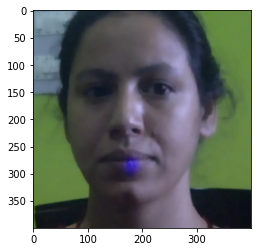

In [10]:
#plot random image
plt.imshow(image.load_img(np.random.choice(valid_image_files)))
plt.show()


In [11]:
#instantiate the VGG16 model body, weights
ptm = PretrainedModel(input_shape=IMAGE_SIZE + [3],
                      weights = 'imagenet',
                      include_top = False)

In [12]:
ptm.trainable = False #freeze the weight of model body

In [13]:
k = len(folders)
x = Flatten()(ptm.output)
x = Dense(k,activation='softmax')(x)

In [14]:
model = Model(inputs = ptm.input, outputs = x)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [16]:
#Data Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:


training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 715 images belonging to 2 classes.
Found 238 images belonging to 2 classes.


In [18]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [19]:
r = model.fit_generator(training_set,
                    validation_data = test_set,
                    epochs = 5,
                    steps_per_epoch = len(training_set),
                    validation_steps = len(test_set),
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 23 steps, validate for 8 steps
Epoch 1/5
23/23 [==============================] - 650s 28s/step - loss: 0.1421 - accuracy: 0.9329 - val_loss: 0.0557 - val_accuracy: 0.9874
Epoch 2/5
23/23 [==============================] - 644s 28s/step - loss: 0.0160 - accuracy: 0.9958 - val_loss: 0.0285 - val_accuracy: 0.9916
Epoch 3/5
23/23 [==============================] - 639s 28s/step - loss: 0.0084 - accuracy: 0.9972 - val_loss: 0.0234 - val_accuracy: 0.9916
Epoch 4/5
23/23 [==============================] - 806s 35s/step - loss: 0.0084 - accuracy: 0.9986 - val_loss: 0.0294 - val_accuracy: 0.9916
Epoch 5/5
23/23 [==============================] - 645s 28s/step - loss: 0.0073 - accuracy: 0.9986 - val_loss: 0.0201 - val_accuracy: 0.9916


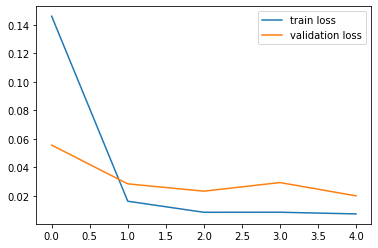

In [23]:
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'],label = 'validation loss')
plt.legend()
plt.show()

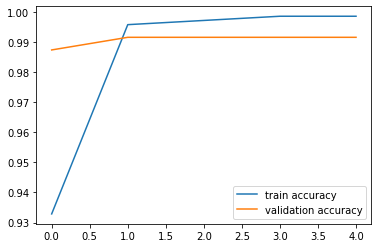

In [24]:
plt.plot(r.history['accuracy'], label = 'train accuracy')
plt.plot(r.history['val_accuracy'],label = 'validation accuracy')
plt.legend()
plt.show()

In [25]:
model.save('facefeatures_new_model_new28052020.h5')